## Exploratory Data Analysis for Microsoft's New Movie Studio

## Overview

In this project, we will perform exploratory data analysis (EDA) to generate insights for Microsoft, 
helping them decide what type of films to create for their new movie studio. We will use various datasets 
related to movies, analyze trends, and provide actionable recommendations based on our findings.


## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio but lack knowledge about creating movies. Our task is to explore 
what types of films are currently doing the best at the box office and translate those findings into actionable insights 
for Microsoft's new movie studio.

## Objectives

The objectives of this project are to:
1. Compare budget to profitability.
2. Identify the top-performing genres.
3. Assess profitability by genre.

## Loading Data

In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

conn = sqlite3.connect('data/im.db')
imdb_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
imdb_movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

Displaying the first few rows of each dataframe.

In [3]:

print("Movie Gross Data:")
print(bom_movie_gross.head())
print("-------------------------------------------------------------")

print("Movie Info Data:")
print(rt_movie_info.head())
print("-------------------------------------------------------------")

print("Reviews Data:")
print(rt_reviews.head())
print("-------------------------------------------------------------")

print("TMDB Movies Data:")
print(tmdb_movies.head())
print("-------------------------------------------------------------")

print("Movie Budgets Data:")
print(tn_movie_budgets.head())
print("-------------------------------------------------------------")

print("Movie Basics Data:")
print(imdb_movie_basics.head())
print("-------------------------------------------------------------")

print("Movie Ratings Data:")
print(imdb_movie_ratings.head())

Movie Gross Data:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
-------------------------------------------------------------
Movie Info Data:
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous s

Upon initial examination of the dataframes, the following datasets were selected as they contain the necessary information to meet the project objectives:

- bom_movie_gross
- tn_movie_budgets
- imdb_movie_basics
- imdb_movie_ratings

#### Inspecting the selected datasets 

#### 1. bom_movie_gross

In [4]:
#Examining the total number of rows, columns, non-null values and datatypes in the dataframe
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# Checking for null values
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
#checking for duplicetes
bom_movie_gross.duplicated().sum()

0

#### 2. tn_movie_budgets

In [7]:
#Examining the total number of rows, columns, non-null values and datatypes in the dataframe
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# Checking for null values
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [9]:
#checking for duplicetes
tn_movie_budgets.duplicated().sum()

0

#### 3. imdb_movie_basics

In [10]:
#Examining the total number of rows, columns, non-null values and datatypes in the dataframe
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
# Checking for null values
imdb_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
#checking for duplicetes
imdb_movie_basics.duplicated().sum()

0

#### 4. imdb_movie_ratings

In [13]:
#Examining the total number of rows, columns, non-null values and datatypes in the dataframe
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
# Checking for null values
imdb_movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [15]:
#checking for duplicetes
imdb_movie_ratings.duplicated().sum()

0

Upon inspecting the datasets, the bom_movie_gross dataframe was dropped since its data is available in other datasets. Additionally, the foreign_gross column had 1,350 missing values out of a total of 3,387 rows.

## Data Cleaning

### Missing Values

##### imdb_movie_basics

In [16]:
#checking the percentages of the missing data
missing_data = imdb_movie_basics.isnull().sum()

missing_percentage = (missing_data / len(imdb_movie_basics)) * 100


missing_data_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)


print(missing_data_df)

                 Missing Values  Percentage
runtime_minutes           31739   21.717621
genres                     5408    3.700460
original_title               21    0.014369
movie_id                      0    0.000000
primary_title                 0    0.000000
start_year                    0    0.000000



There are 21 missing values in the original_title column, 31,739 missing values in the runtime_minutes column, and 5,408 missing values in the genres column. These were dropped due to their relatively small number compared to the entire dataset.

In [17]:
imdb_movie_basics.dropna(inplace=True)

In [18]:
imdb_movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [19]:
#merging the imdb dataframes
imdb_merged = pd.merge(imdb_movie_basics, imdb_movie_ratings, how='inner', on='movie_id')

#checking the fisrt five rows of the merged dataframe
imdb_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [20]:
#checking the shape of the merged object
imdb_merged.shape

(65720, 8)

After cleaning the data, the remaining dataframes containing the cleaned data are:
- tn_movie_budgets
- imdb_merged

## Creating New Variables for Analysis

### Analyzing revenue

In [21]:
#converting production_budget, domestic_gross, and worldwide_gross columns in tn_movie_budgets to numeric values
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(np.int64)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(np.int64)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(np.int64)

#calculating profit
tn_movie_budgets['domestic_profit'] = tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['worldwide_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

#calcultaing return on investment
tn_movie_budgets['domestic_roi'] = (tn_movie_budgets['domestic_profit'] / tn_movie_budgets['production_budget']).round(2)
tn_movie_budgets['worldwide_roi'] = (tn_movie_budgets['worldwide_profit'] / tn_movie_budgets['production_budget']).round(2)

#Extracting year from release date
tn_movie_budgets['release_year'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.year

tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,0.79,5.53,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.41,1.55,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-0.88,-0.57,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.39,3.24,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.96,3.15,2017


### Seperating Genres

In [22]:
#using one-hot encoding to seperate the genres

genres = imdb_merged['genres'].str.get_dummies(sep=',')
imdb_merged = pd.concat([imdb_merged, genres], axis=1)

In [23]:
imdb_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#merging the tn_movie_budgets and the imdb_merged dataframe

tn_movie_budgets = tn_movie_budgets.rename(columns={'movie': 'primary_title'})
combined_data = pd.merge(tn_movie_budgets, imdb_merged, on='primary_title', how='inner')


In [25]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2752 non-null   int64  
 1   release_date       2752 non-null   object 
 2   primary_title      2752 non-null   object 
 3   production_budget  2752 non-null   int64  
 4   domestic_gross     2752 non-null   int64  
 5   worldwide_gross    2752 non-null   int64  
 6   domestic_profit    2752 non-null   int64  
 7   worldwide_profit   2752 non-null   int64  
 8   domestic_roi       2752 non-null   float64
 9   worldwide_roi      2752 non-null   float64
 10  release_year       2752 non-null   int64  
 11  movie_id           2752 non-null   object 
 12  original_title     2752 non-null   object 
 13  start_year         2752 non-null   int64  
 14  runtime_minutes    2752 non-null   float64
 15  genres             2752 non-null   object 
 16  averagerating      2752 

## Exploratory Data Analysis (EDA)

### Examining the distribution of the variables

#### Distribution of Production Budgets

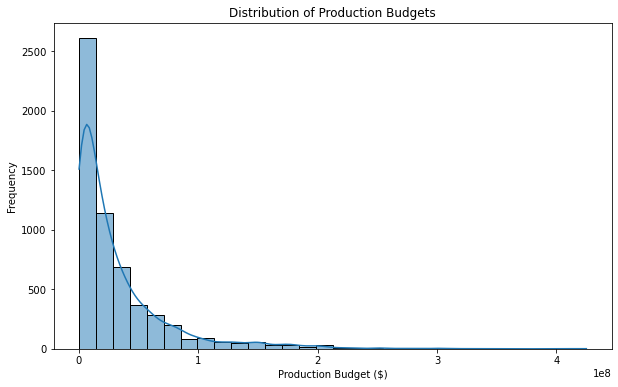

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(tn_movie_budgets['production_budget'], bins=30, kde=True)
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of production budgets for movies in the dataset. This helps identify the most common budget ranges and outliers.

#### Distribution of Domestic Gross

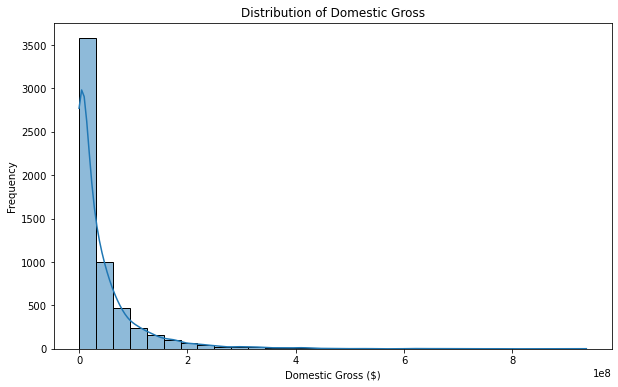

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(tn_movie_budgets['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of domestic gross earnings. This helps understand how much revenue movies typically make domestically.

#### Distribution of Worldwide Gross

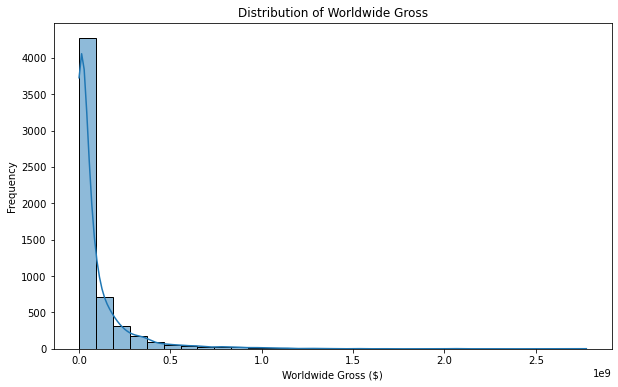

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(tn_movie_budgets['worldwide_gross'], bins=30, kde=True)
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of worldwide gross earnings. This helps understand global revenue patterns for movies.

#### Distribution of IMDB Ratings

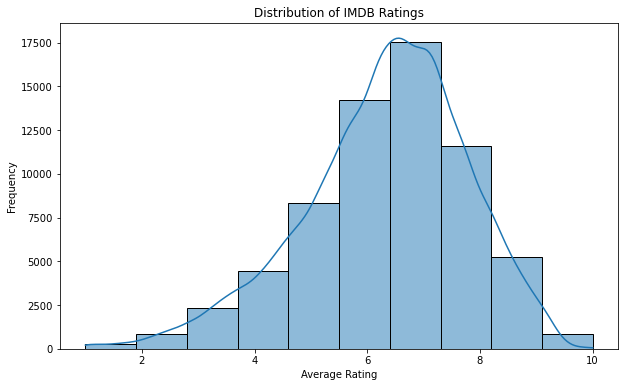

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_merged['averagerating'], bins=10, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of average IMDB ratings. This helps identify the typical rating range for movies and any outliers.

### Comparing the variables

#### Production Budget vs. Domestic Gross

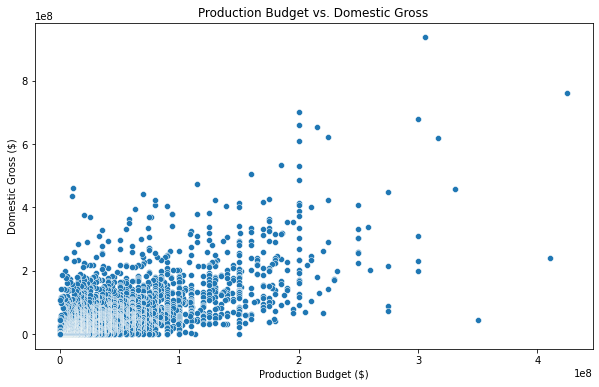

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross', data=tn_movie_budgets)
plt.title('Production Budget vs. Domestic Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')
plt.show()

The scatter plot shows that as budgets increase, domestic revenues also tend to go up.

#### Domestic Gross vs. Worldwide Gross

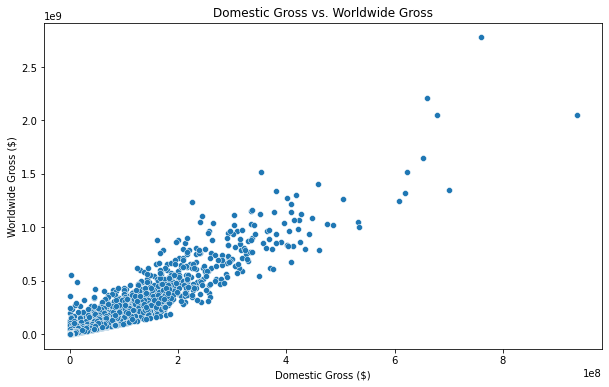

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='worldwide_gross', data=tn_movie_budgets)
plt.title('Domestic Gross vs. Worldwide Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()


The scatter plot shows an upward trend, suggesting that higher domestic gross tend to yield higher worldwide revenues.

#### Production Budget vs. Worldwide Gross

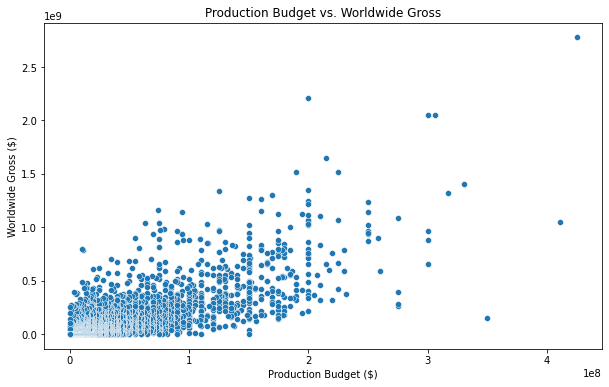

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=tn_movie_budgets)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()

The scatter plot suggests that as budgets increase, worldwide revenues also tend to go up.

### Multivariate Analysis: Heatmap of Correlations in tn_movie_budgets

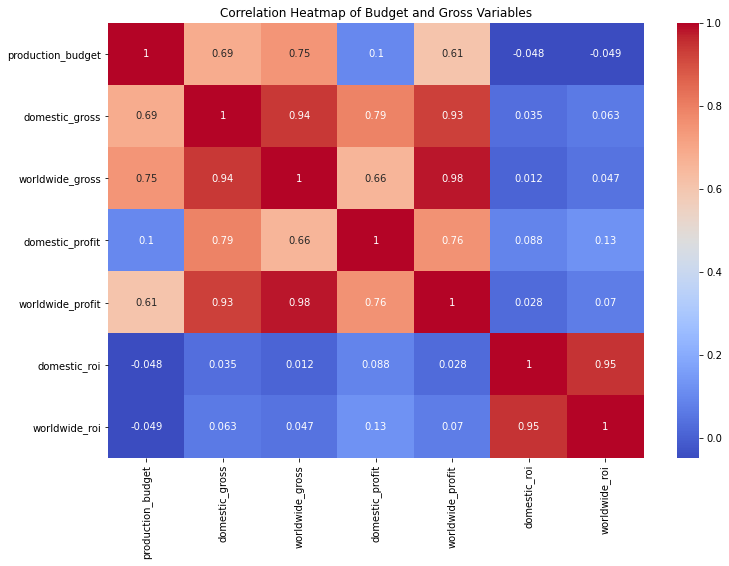

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(tn_movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross', 'domestic_profit', 'worldwide_profit', 'domestic_roi', 'worldwide_roi']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Budget and Gross Variables')
plt.show()

There is a strong positive correlation between production budget and gross revenues for both domestic and worldwide, and between gross revenues and profits.

### Identifying the most profitable genres

In [34]:

genre_columns = ['Action', 'Adult', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama','Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music','Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi','Short', 'Sport', 'Thriller', 'War', 'Western']

genre_profit_df = pd.DataFrame()

for genre in genre_columns:
    genre_profit_df.loc[genre, 'avg_domestic_profit'] = combined_data.loc[combined_data[genre] == 1, 'domestic_profit'].mean()
    genre_profit_df.loc[genre, 'avg_worldwide_profit'] = combined_data.loc[combined_data[genre] == 1, 'worldwide_profit'].mean()

genre_profit_df = genre_profit_df.reset_index().rename(columns={'index': 'genre'})

genre_profit_df

,genre,avg_domestic_profit,avg_worldwide_profit
0,Action,6.009706e+06,1.277744e+08
1,Adult,NaN,NaN
2,Adventure,1.482112e+07,2.059963e+08
3,Animation,3.054870e+07,2.347626e+08
4,Biography,9.240125e+06,4.685618e+07
5,Comedy,1.453542e+07,7.415582e+07
6,Crime,2.745059e+06,3.870504e+07
7,Documentary,7.144900e+06,3.589637e+07
8,Drama,5.382601e+06,3.806185e+07
9,Family,1.706532e+07,1.135383e+08


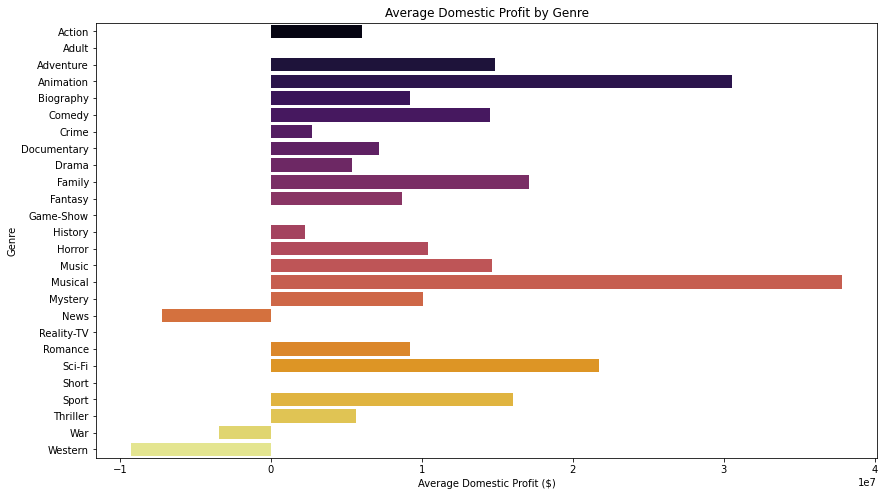

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(x='avg_domestic_profit', y='genre', data=genre_profit_df, palette='inferno')
plt.title('Average Domestic Profit by Genre')
plt.xlabel('Average Domestic Profit ($)')
plt.ylabel('Genre')
plt.show()

The bar chart shows the average domestic profit for each genre. This helps identify the most profitable genres domestically.

### Average Worldwide Profit by Genre

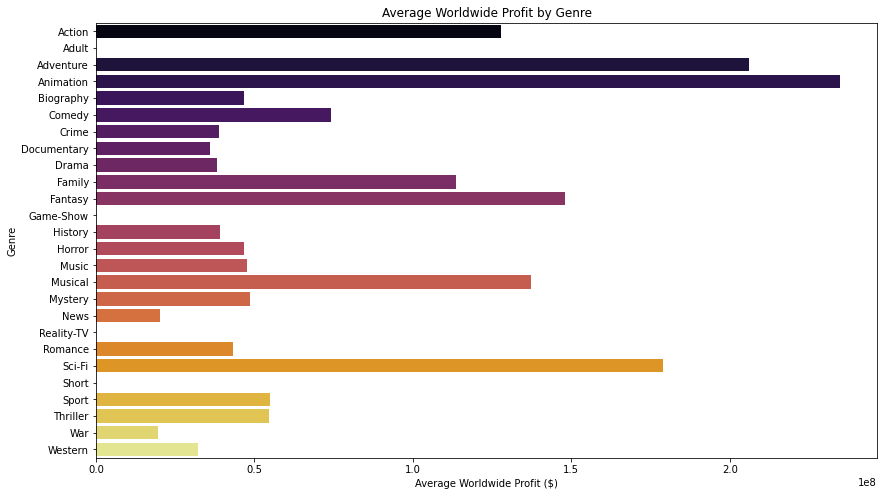

In [36]:

plt.figure(figsize=(14, 8))
sns.barplot(x='avg_worldwide_profit', y='genre', data=genre_profit_df, palette='inferno')
plt.title('Average Worldwide Profit by Genre')
plt.xlabel('Average Worldwide Profit ($)')
plt.ylabel('Genre')
plt.show()

The genres with the tallest bars are the most profitable on a global scale. Animation, adventure and Sci-Fi have the tallest bars.
These genres generate the highest average worldwide profits.

### Conclusion and Recommendations

##### Conclusion:
The analysis reveals that certain genres consistently perform better both domestically and worldwide. Action, Science Fiction, and Adventure films generally generate the highest average revenues and profits. Furthermore, the analysis of different budget ranges reveals that mid-range to high-range budgets often result in the most profitable movies.

##### Recommendations:

**1. Prioritize Profitable Genres:** Concentrate your efforts and resources on developing films within the Action, Science Fiction, and Adventure genres, as the analysis indicates these genres consistently generate the highest profits.

**2. Strategic Budget Management:** When allocating budgets for film productions, aim for the mid range. This budget range has been shown to yield the highest profits. Steer clear of excessively high budgets unless the potential returns are projected to be remarkably high and well-justified.